In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import konlpy
from konlpy.tag import Okt
from konlpy.tag import Mecab

In [3]:
# import os
# os.environ['JAVA_HOME'] = '/path/to/java/home'
# tokenizer = Okt()
tokenizer = Mecab('/opt/homebrew/lib/mecab/dic/mecab-ko-dic')

In [4]:
text = '함께 탐험하며 성장하는 AI 학교 AIFFEL'
tokenizer.morphs(text)

['함께', '탐험', '하', '며', '성장', '하', '는', 'AI', '학교', 'AIFFEL']

In [5]:
tokenizer.nouns(text)

['탐험', '성장', '학교']

In [6]:
tokenizer.pos(text)

[('함께', 'MAG'),
 ('탐험', 'NNG'),
 ('하', 'XSV'),
 ('며', 'EC'),
 ('성장', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('AI', 'SL'),
 ('학교', 'NNG'),
 ('AIFFEL', 'SL')]

In [7]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
words = tokenizer.morphs(text)

In [9]:
vect.fit(words)

CountVectorizer()

In [10]:
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장', '탐험', '학교', '함께'], dtype=object)

In [11]:
vect.vocabulary_

{'함께': 5, '탐험': 3, '성장': 2, 'ai': 0, '학교': 4, 'aiffel': 1}

In [12]:
len(vect.vocabulary_)

6

In [13]:
df_t = vect.transform(words)

In [14]:
df_t.toarray()

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

In [15]:
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장,탐험,학교,함께
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,1,0,0,0,0,0
8,0,0,0,0,1,0
9,0,1,0,0,0,0


In [16]:
test = 'AI 공부하며 함께 성장해요~'

In [17]:
words =tokenizer.morphs(test)
words

['AI', '공부', '하', '며', '함께', '성장', '해요', '~']

In [18]:
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [19]:
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장,탐험,학교,함께
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
5,0,0,1,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0


In [20]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 5, '탐험': 3, '성장': 2, 'ai': 0, '학교': 4, 'aiffel': 1}

In [21]:
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [22]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

In [23]:
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [24]:
df.shape

(150000, 3)

In [25]:
df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [26]:
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [29]:
df['len'] = df['document'].apply(len)
df

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61
...,...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,19
149996,8549745,평점이 너무 낮아서...,1,13
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,31
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,27


<Axes: ylabel='Frequency'>

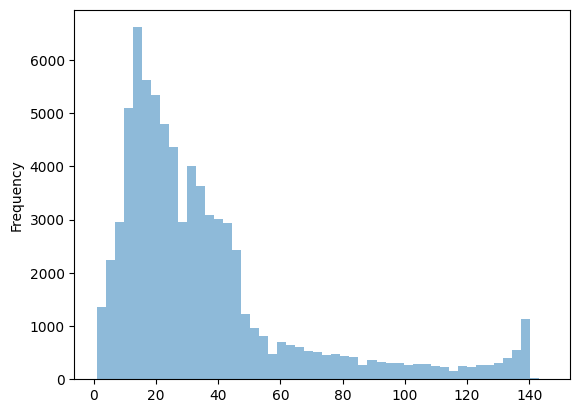

In [30]:
import matplotlib.pyplot as plt
df[df.label == 0]['len'].plot(kind='hist', alpha=0.5, bins=50, label='0')

<Axes: ylabel='Frequency'>

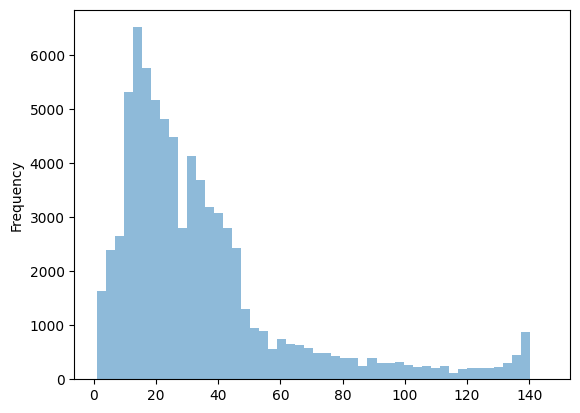

In [31]:
df[df.label == 1]['len'].plot(kind='hist', alpha=0.5, bins=50, label='0')

In [32]:
df = df[:1000]
df.shape

(1000, 4)

In [33]:
vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

In [34]:
from matplotlib.pylab import rand
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.6989417989417989

In [35]:

import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

# 형태소 분석기 지정
tokenizer = Mecab('/opt/homebrew/lib/mecab/dic/mecab-ko-dic')

# 결측치 제거
df.dropna(inplace=True)

# 문자열 백터화 (CountVectorizer)
vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

# 모델 정의 및 훈련
model = RandomForestClassifier(random_state=2022, n_jobs=-1)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.8314915616770768

In [37]:
shape = vectors.shape
shape

(149995, 53515)

In [36]:
!pip install git+https://github.com/jungin500/py-hanspell

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/jungin500/py-hanspell to /private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-req-build-41714f56
  Running command git clone --filter=blob:none --quiet https://github.com/jungin500/py-hanspell /private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-req-build-41714f56
  Resolved https://github.com/jungin500/py-hanspell to commit 9cf4ce38a8d259b92dc8af3f35d7c2442e130180
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
